In [32]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from model import quad
from utils_general import *
from sphere import *

# hyper params initalization
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Hyper-param Config

In [25]:
_lr_rate = 0.0001
batch_size = 50
# total_samples = 50e6
# total_samples = 1e4
total_iterations = 4e3
r = 1.3
dim = 500
err_freq = 100
pgd_itr = 1
seed = 0

# Training begins

In [43]:
seed_everything(seed)
_model = quad().to(_device)
# _model = make_perfect_model(_model, 1.3, _device)
_opt = optim.Adam(_model.parameters(), lr = _lr_rate)

# log = train_clean(dim, r, total_samples, batch_size, err_freq, _model, _opt, _device)
# log = train_adv(pgd_itr, dim, r, total_samples, batch_size, err_freq, _model, _opt, _device)
stats = train_true_max(dim, r, total_iterations, err_freq, _model, _opt, _device)

 82%|████████▎ | 3300/4000 [06:14<01:17,  9.03it/s, acc=0.00%, good_alpha=99.60%, loss=0.693, sphere=Inner]  


# Plot results

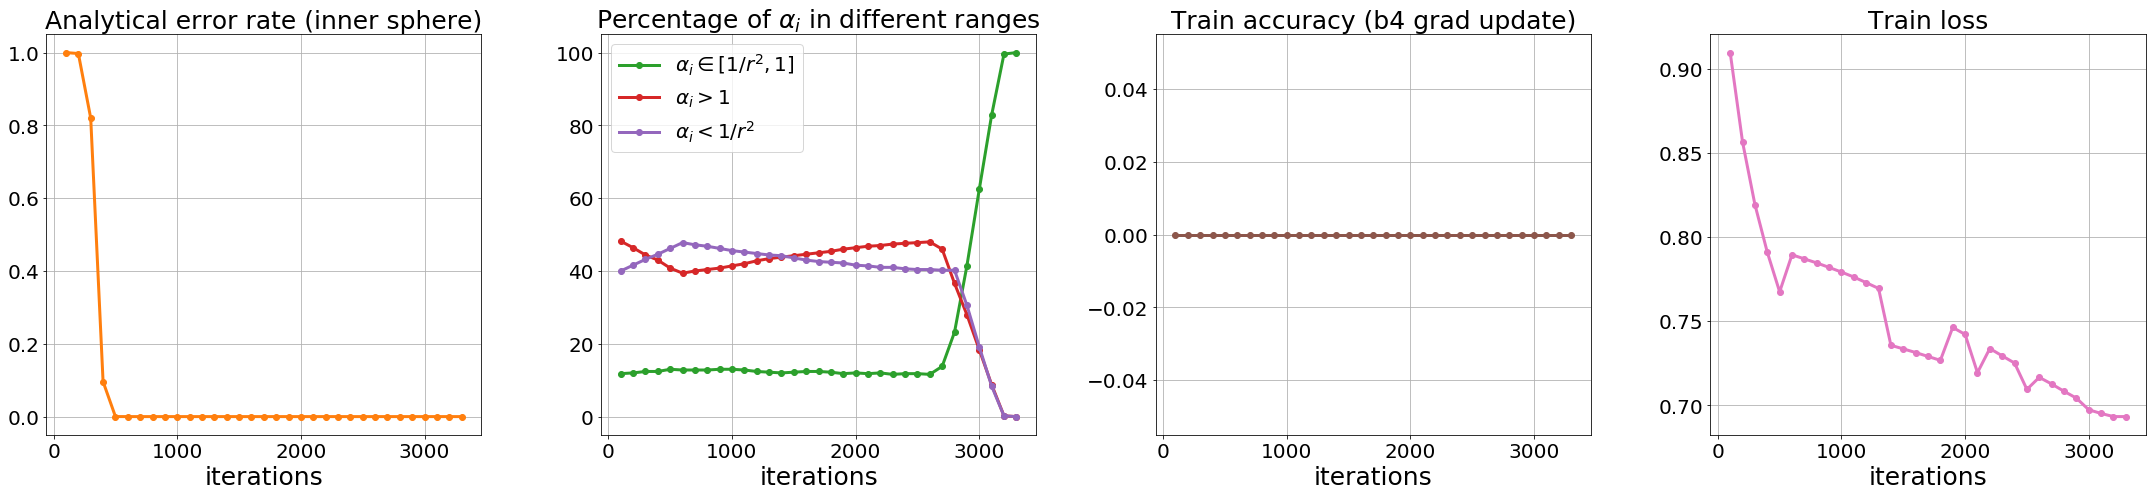

In [44]:
fig = plot_stats(stats, False)